In [ ]:
!pip install qrcode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.1 MB/s eta 0:00:00


In [ ]:
# !pip show diffusers==0.15.1

In [ ]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.7 MB/s eta 0:00:00


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.9 MB/s eta 0:00:00


In [ ]:
!pip install python-dotenv

In [ ]:
!pip install xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 8.4 MB/s eta 0:00:00


In [ ]:
import torch

import qrcode
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from PIL import Image
from dotenv import load_dotenv
load_dotenv()

False

In [ ]:
controlnet = ControlNetModel.from_pretrained(
    "DionTimmer/controlnet_qrcode-control_v1p_sd15",
    torch_dtype = torch.float16
)

In [ ]:
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    # "runwayml/stable-diffusion-v1-5",
    "digiplay/GhostMixV1.2VAE",
    controlnet = controlnet,
    torch_dtype = torch.float16,
    safety_checker =None,
).to("cuda")
pipe.enable_xformers_memory_efficient_attention()

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:
def generate_qr_code(content:str):
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size = 16,
        border = 0,
    )

    qr.add_data(content)
    qr.make(fit=True)
    img = qr.make_image(fill_color = "black",back_color = "white")

    offset_min = 8*16
    w,h = img.size
    w = (w+255+offset_min)//256*256
    h = (h+255+offset_min)//256*256

    if w>1024:
        raise ValueError("QR Code is to big")

    bg = Image.new("L",(w,h),255)

    coords = ((w-img.size[0])//2//16*16,
              (h-img.size[1])//2//16*16
              )
    bg.paste(img, coords)
    return bg


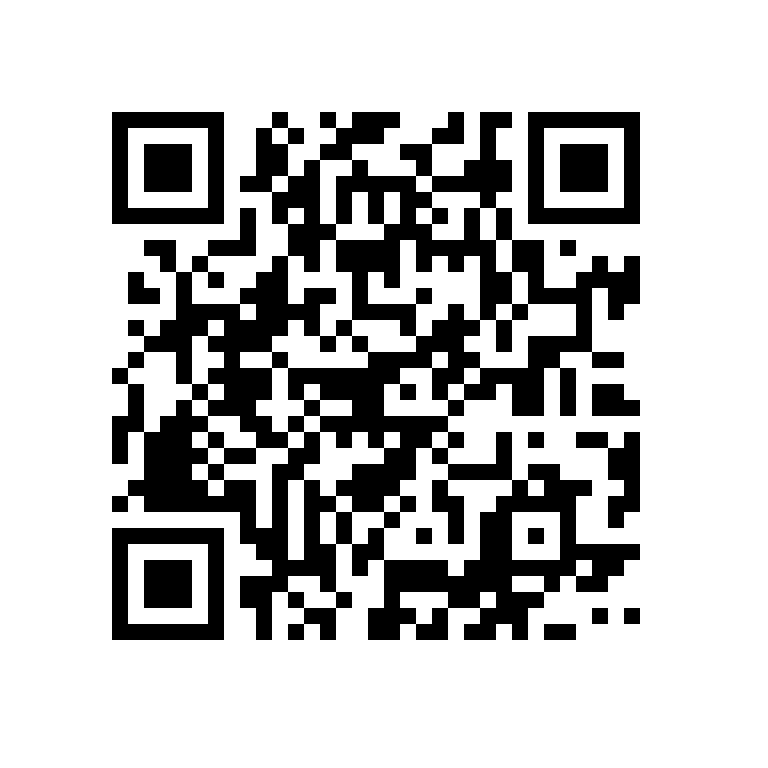

In [ ]:
generate_qr_code("https://vieclesports.com/")

Seed: 633063711025


  0%|          | 0/50 [00:00<?, ?it/s]

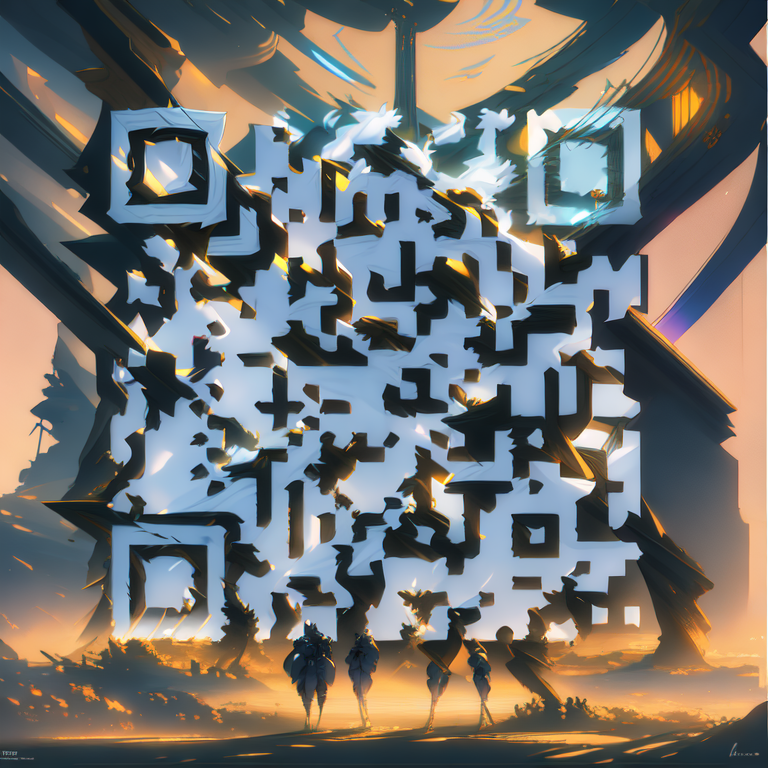

In [ ]:
prompt = "concept art, Complementary 'Tour de France', award winning, at Dawn, Cel shading, Animecore, Direct light, geometric patterns, high quality, absurdres,scenic, masterpiece  <lora:add_detail:1>"
# negative_prompt = "EasyNegativeV2, (bad-hands-5:1.2) Steps: 22, Sampler: Euler a, CFG scale: 8, Seed: 3478501788, Size: 768x768, Model hash: ec6f68ea63, ControlNet 0: preprocessor: inpaint_global_harmonious, model: controlnetQRCode_sd15V1 [9c780d03], weight: 1.2, starting/ending: (0, 1), resize mode: Crop and Resize, pixel perfect: True, control mode: Balanced, preprocessor params: (-1, -1, -1), Lora hashes: add_detail: 7c6bad76eb54"
negative_prompt = "ugly, disfigured, low quality, blurry,bad quality"
qrcode_content = "https://vieclesports.com/"
qr_code_image = generate_qr_code(qrcode_content)
# generator = torch.Generator().manual_seed(2174793473)
seed = random.randint(1, 1000000000000)
negative_prompt = "ugly, disfigured, low quality, blurry"
print("Seed:",seed)

generator = torch.Generator().manual_seed(seed)
# .manual_seed(2324230317)
# .initial_seed(2174793473)


output = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image = qr_code_image,
    width = qr_code_image.width,
    height=qr_code_image.height,
    guidance_scale=10,
    controlnet_conditioning_scale=2.75,
    control_guidance_start= 0.23,
    control_guidance_end= 0.9,
    generator=generator,
    num_inference_steps=50,
    # seed = 2174793473
)
output[0][0]


In [ ]:
c =output[0][0]

In [ ]:
type(c)

PIL.Image.Image

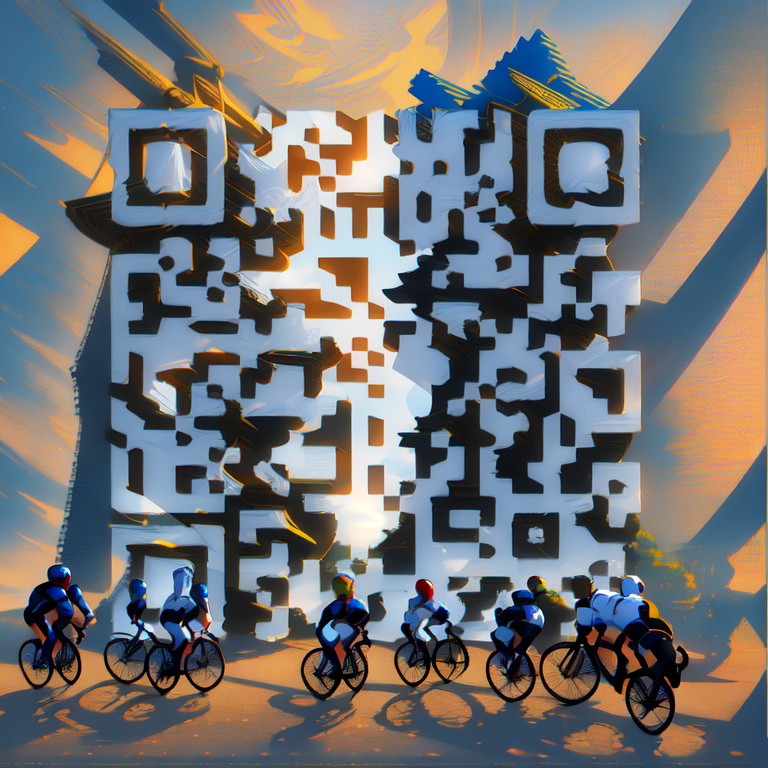

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from PIL import Image
from google.colab import files

# Assuming 'c' contains the image in 'PIL.Image.Image' format
# Save the image to a file before downloading
c.save('generated_image.png')

# Display the saved image
display(c)

# Generate a download link for the saved image
files.download('generated_image.png')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# prompt = "<lora:add_detail:1.5> , (Macro photo), miniature, (diorama), red panda (plushie), chibi, toy, (bokeh), close-up photo, 35mm, bokeh, 9:16, (intricate details:1.12), hdr, (intricate details, hyperdetailed:1.15), (soft light, sharp:1.5) <lyco:GoodHands-beta2:1> <lora:COOLKIDS:0.5>"
# prompt =" saigyou_ayakashi,  <lora:SaigyouAyakashiV1-000008:1>,bare tree,"
prompt = "light, futobot, cyborg, ((masterpiece),(best quality),(ultra-detailed), (full body:1.2), 1male, solo, hood up, upper body, mask, 1boy, male focus,white gloves, cloak, long sleeves, spaceship, lightning, hires"
# negative_prompt = "EasyNegativeV2, (bad-hands-5:1.2) Steps: 22, Sampler: Euler a, CFG scale: 8, Seed: 3478501788, Size: 768x768, Model hash: ec6f68ea63, ControlNet 0: preprocessor: inpaint_global_harmonious, model: controlnetQRCode_sd15V1 [9c780d03], weight: 1.2, starting/ending: (0, 1), resize mode: Crop and Resize, pixel perfect: True, control mode: Balanced, preprocessor params: (-1, -1, -1), Lora hashes: add_detail: 7c6bad76eb54"
negative_prompt = "ugly, disfigured, low quality, blurry"
qrcode_content = 'Enter the URL of the website you want to generate a QR code for.'
qr_code_image = generate_qr_code(qrcode_content)
# generator = torch.Generator().manual_seed(2174793473)
seed = random.randint(1, 1000000000000)
negative_prompt = "ugly, disfigured, low quality, blurry"
print("Seed:",seed)

generator = torch.Generator().manual_seed(seed)
# .manual_seed(2324230317)
# .initial_seed(2174793473)


output = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image = qr_code_image,
    width = qr_code_image.width,
    height=qr_code_image.height,
    guidance_scale=10,
    controlnet_conditioning_scale=2.75,
    control_guidance_start= 0.23,
    control_guidance_end= 0.9,
    generator=generator,
    num_inference_steps=50,
    # seed = 2174793473
)
output[0][0]

In [ ]:
output[0][0].save("cyborg.png")